In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('source\datasets_177976_401124_Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = data.drop(['CustomerID'], axis = 1)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
data['Genre'] = data['Genre'].map({'Female': 1, 'Male': 0})
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


#### Clustering based on Annual Income and Spending Score

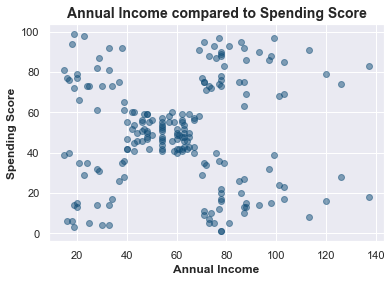

In [5]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],                               alpha = 0.5,
            color = '#124E78')
plt.title('Annual Income compared to Spending Score',
              fontsize = 14,
              fontweight = 'bold')
plt.xlabel('Annual Income',
               fontsize = 12,
               fontweight = 'bold')
plt.ylabel('Spending Score',
               fontsize = 12,
               fontweight = 'bold')
plt.show()

In [6]:
X = data.iloc[:,2:4]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
wcss = []
for i in range(1, 200):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcssIter = kmeans.inertia_
    wcss.append(wcssIter)

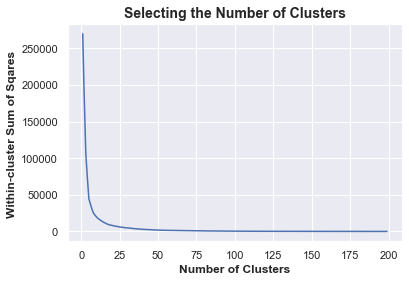

In [8]:
numClusters = range(1, 200)
plt.plot(numClusters, wcss)
plt.title('Selecting the Number of Clusters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12, fontweight = 'bold')
plt.ylabel('Within-cluster Sum of Sqares ', fontsize = 12, fontweight = 'bold')
plt.savefig('visualizations/SNC.png')
plt.show()

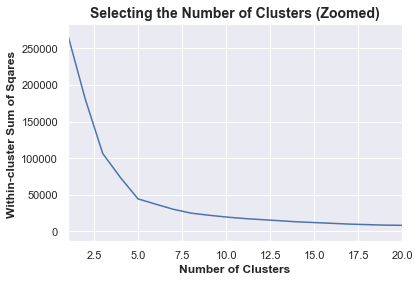

In [9]:
numClusters = range(1, 200)
plt.plot(numClusters, wcss)
plt.title('Selecting the Number of Clusters (Zoomed)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Clusters', fontsize = 12, fontweight = 'bold')
plt.xlim(left = 1, right = 20)
plt.ylabel('Within-cluster Sum of Sqares ', fontsize = 12, fontweight = 'bold')
plt.savefig('visualizations/SNCB.png')
plt.show()

In [10]:
kmeans = KMeans(7)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
identifiedClusters = kmeans.fit_predict(X)
identifiedClusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6])

In [12]:
dataWClusters = data.copy()
dataWClusters['Clusters'] = identifiedClusters
dataWClusters.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,2
1,0,21,15,81,4
2,1,20,16,6,2
3,1,23,16,77,4
4,1,31,17,40,2


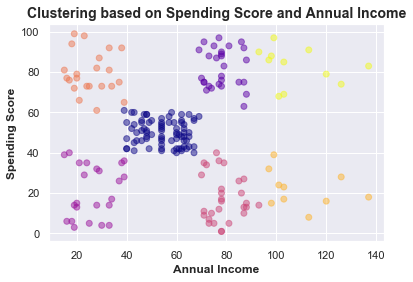

In [13]:
plt.scatter(dataWClusters['Annual Income (k$)'],
            dataWClusters['Spending Score (1-100)'],
            c = dataWClusters['Clusters'],
            alpha = 0.5,
            cmap = 'plasma')

plt.title('Clustering based on Spending Score and Annual Income',
          fontsize = 14,
          fontweight = 'bold')
plt.xlabel('Annual Income',
          fontsize = 12,
          fontweight = 'bold')
plt.ylabel('Spending Score',
          fontsize = 12,
          fontweight = 'bold')
plt.savefig('visualizations/CSSAI.png')
plt.show()